In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [3]:
def foo_k_r(T):
    return k_r0 * math.e**(-E_a/(R_u*T))

In [4]:
def foo_k(T, gas_name):
    if gas_name == 'H2':
        a0 = 0.3975
        a1 = 0.4814/10**4
        a2 = -1.073/10**7
        a3 = 4.6863/10**11
        a4 = -8.5361/10**15
        a5 = 5.6934/10**19
    elif gas_name == 'O2':
        a0 = 0.4697
        a1 = -2.9819/10**4
        a2 = 2.0320/10**7
        a3 = -7.1938/10**11
        a4 = 12.311/10**15
        a5 = -8.0736/10**19
    elif gas_name == 'H2O':
        a0 = 0.3834
        a1 = -1.8579/10**4
        a2 = 0.6266/10**7
        a3 = -1.0528/10**11
        a4 = 0.93554/10**15
        a5 = -0.38512/10**19
    else:
        print('Houston we have a problem')
    return 1 + a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 + a5*T**5

In [62]:
def foo_alpha(r):
    if r >= 0.000001:
        a = 1 - math.e**(-r)
        return (1-a/r)/a
    else:
        return 0.5

In [63]:
# параметры установки
d = 45*10**(-3) # калибр
S = math.pi*d**2/4 # площадь
W_0 = 0.005 # объем каморы
l_d = 4.5 # длина ствола
m_elem = 0.52 # масса МЭ
p_0 = 34.5 * 10**6 # начальное давление
p_f = 172 * 10**6 # давление форсирования
k_r0 = 9.87 * 10**8 # предэскп. множитель 

Q_t = 13.4 * 10**6 # энергия образования 1 кг продуктов реакций 
E_ign = 0 # энергия воспламенителя
E_a = 60*10**3 # энергия активации

v_p0 = 0 # начальная скорость
x_p0 = 0 # начальная координата
p_a = 10**5 # атмосфэрное давление

In [65]:
p_0 = 34.5 * 10**6 # начальное давления
T_0 = 300 # начальная температура
R_u = 8.31446262 # универсальная газовая постоянная
hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей

In [64]:
mu_H2 = 2*10**(-3) # молярная масса водорода
mu_O2 = 32*10**(-3) # молярная масса кислорода
mu_H2O = 18*10**(-3) # молярная масса воды

In [66]:
# термодинамика
# R = foo_k_r * () # универсальная газовая постоянная
# m_g_0 = (2*mu_H2+mu_O2) * R_u * T_0/ (p_0 * W_0)
# print(m_g_0)
# rho_0 = m_g_0/W_0
# rho_0 = p_0/(R_u*T_0) # начальная плотность газа
# m_g_0 = rho_0*W_0 # начальная масса газа

# hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей
# ratio_m_O2_and_m_H2_0 = hi_O2_and_H2_0*mu_O2/mu_H2 # начальное соотношение масс газа через мольные доли, скрин "мольные доли.png"

# m_H2_0 = m_g_0 / (ratio_m_O2_and_m_H2_0+1) # начальная масса водорода
# m_O2_0 = m_H2_0 * ratio_m_O2_and_m_H2_0 # начальная масса кислорода

# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

# С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
# С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода

# C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [67]:
n_smesi = p_0 * W_0/(R_u * T_0)
m_O2_0 = n_smesi * mu_O2 / (hi_O2_and_H2_0 * mu_O2/mu_H2+1)
m_H2_0 = n_smesi * mu_H2 - m_O2_0 / mu_O2 * mu_H2

In [68]:
n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода
n_H2O_0 = 0 # начальное количества вещества воды

In [69]:
С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода
C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [70]:
help_value_T_0 = (n_H2_0/(foo_k(T_0,'H2')-1) + n_O2_0/(foo_k(T_0,'O2')-1) + n_H2O_0/(foo_k(T_0,'H2O')-1))**(-1)
k_smesi_T_0 = 1 + n_H2_0*help_value_T_0 + n_O2_0*help_value_T_0 + n_H2O_0*help_value_T_0 # показатель адиабаты смеси для формулы 4.5

In [71]:
tau = 0 # время от начала процесса
C_n_1 = np.array([С_H2_0, С_O2_0, C_H2O_0]) # начальный вектор C
P_n = np.array([0, 0, foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(1/2)]) # начальный вектор Р
D_n = np.array([foo_k_r(T_0)*C_n_1[1]**(1/2), 1/2*foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(-1/2),0]) # начальный вектор D
W_n_1 = W_0 # начальный объем
v_p = v_p0 # начальная скорость

tau_arr = []
C_H2_arr = []
C_O2_arr = []
C_H2O_arr = []
m_H2_arr = []
m_O2_arr = []
m_H2O_arr = []
v_p_arr = []
p_m_arr = []
x_p_arr = []
M_p_arr = []
# rho_arr = []
T_arr = []

tau_arr = np.array(tau_arr)
C_H2_arr = np.array(C_H2_arr)
C_O2_arr = np.array(C_O2_arr)
C_H2O_arr = np.array(C_H2O_arr)
m_H2_arr = np.array(m_H2_arr)
m_O2_arr = np.array(m_O2_arr)
m_H2O_arr = np.array(m_H2O_arr)
v_p_arr = np.array(v_p_arr)
p_m_arr = np.array(p_m_arr)
x_p_arr = np.array(x_p_arr)
M_p_arr = np.array(M_p_arr)
# rho_arr = np.array(rho_arr)
T_arr = np.array(T_arr)

dt=1e-9
x_p = x_p0
T = T_0

schetchik=0

while x_p <= l_d: # условие цикла, пока МЭ не покинул дульный срез
    schetchik+=1
    tau += dt # время от начала процесса
#     tau_arr = np.append(tau_arr, tau)
    
    C_n = C_n_1 # вектор С
#     C_H2_arr = np.append(C_H2_arr, C_n[0])
#     C_O2_arr = np.append(C_O2_arr, C_n[1])
#     C_H2O_arr = np.append(C_H2O_arr, C_n[2])
    
    W_n = W_n_1
    
    n_H2 = C_n[0] * W_n # количество вещества водорода
    n_O2 = C_n[1] * W_n # количество вещества кислорода
    n_H2O = C_n[2] * W_n # количество вещества воды
    
    m_H2 = n_H2 * mu_H2 # масса водорода
    m_O2 = n_O2 * mu_O2 # масса кислорода
    m_H2O = n_H2O * mu_H2O # масса воды
#     m_H2_arr = np.append(m_H2_arr, m_H2)
#     m_O2_arr = np.append(m_O2_arr, m_O2)
#     m_H2O_arr = np.append(m_H2O_arr, m_H2O)
    n_smesi = n_H2 + n_O2 + n_H2O # количество вещества смеси
    

    P_n = np.array([0, 0, foo_k_r(T)*C_n[0]*C_n[1]**(1/2)]) # вектор P
    D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),0]) # вектор D

    M_p = mu_H2O * C_n[2] * W_n # масса продуктов реакции
#     M_p_arr = np.append(M_p_arr, M_p)

    phi = (1+(m_H2 + m_O2 + m_H2O)/(3*m_elem)) # фиктивность, масса всего
    
    # расчет показателя адиабаты смеси
    help_value = (n_H2/(foo_k(T,'H2')-1) + n_O2/(foo_k(T,'O2')-1) + n_H2O/(foo_k(T,'H2O')-1))**(-1)
    k_smesi = 1 + n_H2*help_value + n_O2*help_value + n_H2O*help_value # показатель адиабаты смеси для формулы 4.5
    
    p_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*M_p - E_ign - phi/2*m_elem*v_p**2) # среднебаллистическое давление

    #     p_m_arr = np.append(p_m_arr, p_m)

    T = p_m*W_n/(R_u*n_smesi)
#     T_arr = np.append(T_arr,T)

#     if p_m<=p_f:
#         dv_p = 0
#     else:
#         dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    v_p += dv_p # скорость МЭ
#     v_p_arr = np.append(v_p_arr, v_p)

    dx_p = v_p * dt # диф. координаты МЭ
    
    x_p += dx_p  # координата МЭ
#     x_p_arr = np.append(x_p_arr, x_p)
    
    W_n_1 = W_0 + x_p*S  # Заснарядный объем на n+1 шаге
    
    W_n = W_0 + (x_p-dx_p)*S # Заснарядный объем на n шаге
           
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n)):
        foo_alpha_res[i] = foo_alpha(D_n[i]*dt)
        
    C_n_kr = W_n/W_n_1 * (C_n + (dt *(P_n-C_n*D_n))/(1+foo_alpha_res*D_n*dt)) # Предиктор вектора С
   
    if C_n_kr[1]>=1e-1:
        D_n_kr = (np.array([foo_k_r(T)*C_n_kr[1]**(1/2), 1/2*foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(-1/2),0]) + D_n)/2 # Предиктор вектора D
    else:
         D_n_kr = np.array([0,0,0])
            
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n_kr)):
        foo_alpha_res[i] = foo_alpha(D_n_kr[i]*dt)
    
    if C_n_kr[1]>=1e-1:
        P_n_kr = foo_alpha_res*np.array([0, 0, foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(1/2)]) + (1-foo_alpha_res)*P_n # Предиктор вектора P    
    else:
        P_n_kr = np.array([0, 0, 0])
    C_n_1 = W_n/W_n_1 * (C_n + (dt *(P_n_kr-C_n*D_n_kr))/(1+foo_alpha_res*D_n_kr*dt)) # Корректор вектора С
    
    if schetchik % 10_000 == 0:
        tau_arr = np.append(tau_arr, tau)
        x_p_arr = np.append(x_p_arr, x_p)
        C_H2_arr = np.append(C_H2_arr, C_n[0])
        C_O2_arr = np.append(C_O2_arr, C_n[1])
        C_H2O_arr = np.append(C_H2O_arr, C_n[2])
        m_H2_arr = np.append(m_H2_arr, m_H2)
        m_O2_arr = np.append(m_O2_arr, m_O2)
        m_H2O_arr = np.append(m_H2O_arr, m_H2O)
        M_p_arr = np.append(M_p_arr, M_p)
        v_p_arr = np.append(v_p_arr, v_p)
        T_arr = np.append(T_arr,T)
        p_m_arr = np.append(p_m_arr, p_m)
        print(x_p, p_m/10**6, C_n)

4.787591108338454e-06 34.50476591554957 [1.37240302e+04 1.07194268e+02 5.02207477e-02]
1.9150285309395424e-05 34.509400921164385 [1.37239171e+04 1.07168583e+02 1.00610609e-01]
4.3089372553736796e-05 34.51390441407836 [1.37237620e+04 1.07142490e+02 1.51163581e-01]
7.660610619100493e-05 34.51827627501257 [1.37235650e+04 1.07115989e+02 2.01878661e-01]
0.00011970170293672236 34.522516387151136 [1.37233260e+04 1.07089082e+02 2.52754834e-01]
0.0001723773428397826 34.52662463614438 [1.37230451e+04 1.07061767e+02 3.03791071e-01]
0.00023463416925062152 34.530600910111424 [1.37227221e+04 1.07034047e+02 3.54986330e-01]
0.00030647328879008704 34.534445099643044 [1.37223572e+04 1.07005920e+02 4.06339556e-01]
0.00038789577131898684 34.53815709780418 [1.37219503e+04 1.06977389e+02 4.57849681e-01]
0.0004789026499083231 34.54173680013668 [1.37215015e+04 1.06948453e+02 5.09515622e-01]
0.0005794949208102312 34.54518410466158 [1.37210107e+04 1.06919113e+02 5.61336286e-01]
0.0006896735434295815 34.54849891

0.04418341279710477 34.34930771948333 [1.35285081e+04 1.03040366e+02 5.38636823e+00]
0.04510799498766131 34.34126143445893 [1.35245245e+04 1.02979867e+02 5.44605413e+00]
0.046042106776415244 34.33308342903795 [1.35205027e+04 1.02919063e+02 5.50575450e+00]
0.04698574588736575 34.32477381953027 [1.35164428e+04 1.02857955e+02 5.56546733e+00]
0.047938910007884306 34.31633272465423 [1.35123449e+04 1.02796546e+02 5.62519057e+00]
0.04890159678874989 34.30776026553444 [1.35082092e+04 1.02734836e+02 5.68492221e+00]
0.049873803844181525 34.29905656569913 [1.35040356e+04 1.02672828e+02 5.74466020e+00]
0.050855528751873 34.2902217510776 [1.34998243e+04 1.02610522e+02 5.80440250e+00]
0.05184676905302824 34.28125594999801 [1.34955753e+04 1.02547922e+02 5.86414706e+00]
0.05284752225239677 34.27215929318469 [1.34912887e+04 1.02485027e+02 5.92389182e+00]
0.05385778581830944 34.26293191375545 [1.34869647e+04 1.02421841e+02 5.98363472e+00]
0.05487755718271641 34.25357394721966 [1.34826033e+04 1.02358365e

0.17777799856967771 32.98086315592165 [1.29786226e+04 9.60128001e+01 1.09362567e+01]
0.17961111148914188 32.96092811085149 [1.29714065e+04 9.59311089e+01 1.09876903e+01]
0.18145336984980506 32.94088347630934 [1.29641627e+04 9.58492916e+01 1.10389420e+01]
0.18330476807309723 32.920729590392895 [1.29568915e+04 9.57673500e+01 1.10900100e+01]
0.18516530055004787 32.90046679333187 [1.29495929e+04 9.56852860e+01 1.11408928e+01]
0.18703496164137184 32.880095427482985 [1.29422671e+04 9.56031014e+01 1.11915886e+01]
0.18891374567756802 32.85961583732472 [1.29349142e+04 9.55207980e+01 1.12420957e+01]
0.19080164695901713 32.83902836945238 [1.29275344e+04 9.54383777e+01 1.12924125e+01]
0.1926986597560784 32.81833337257243 [1.29201277e+04 9.53558423e+01 1.13425373e+01]
0.19460477830918083 32.79753119749723 [1.29126943e+04 9.52731936e+01 1.13924686e+01]
0.19651999682892898 32.77662219713933 [1.29052344e+04 9.51904334e+01 1.14422046e+01]
0.19844430949619413 32.75560672650587 [1.28977480e+04 9.51075636

0.39724993523849955 30.593685041861743 [12169.59378937    87.75052834    14.88136768]
0.3999400634721104 30.56498129533728 [12160.31604465    87.66413824    14.90962465]
0.4026386703375529 30.536209398916526 [12151.02351383    87.57776422    14.93761424]
0.40534574782740657 30.507369849773326 [12141.71632499    87.49140724    14.96533654]
0.40806128791541413 30.47846314590735 [12132.39460601    87.40506826    14.99279163]
0.41078528255662833 30.44948978612086 [12123.05848456    87.31874823    15.01997962]
0.41351772368756184 30.42045026999549 [12113.70808806    87.23244807    15.04690063]
0.4162586032263055 30.39134509786922 [12104.34354374    87.14616872    15.07355482]
0.4190079130726785 30.362174770812548 [12094.96497859    87.05991108    15.09994233]
0.4217656451083662 30.332939790605288 [12085.57251935    86.97367605    15.12606336]
0.4245317911970639 30.30364065971244 [12076.16629255    86.88746453    15.1519181 ]
0.42730634318461336 30.27427788126047 [12066.74642448    86.801277

0.6964320976391299 27.56670167729115 [11218.77111542    79.5527134     16.44482306]
0.6999050824329319 27.533738718008202 [11208.61456307    79.47092259    16.44978611]
0.7033857022418893 27.50075604126604 [11198.45427606    79.38919797    16.45455539]
0.7068739478866809 27.4677541100643 [11188.29035095    79.30753971    16.4591321 ]
0.7103698101826267 27.434733385942106 [11178.12288396    79.22594798    16.46351742]
0.7138732799398307 27.401694328960343 [11167.95197086    79.14442293    16.46771254]
0.7173843479632818 27.368637397684616 [11157.77770708    79.06296473    16.47171867]
0.7209030050529894 27.335563049168307 [11147.60018761    78.98157353    16.475537  ]
0.7244292420041338 27.302471738935708 [11137.41950708    78.90024948    16.47916873]
0.7279630496071555 27.269363920965766 [11127.23575972    78.81899272    16.48261505]
0.7315044186479062 27.236240047675704 [11117.04903935    78.73780338    16.48587719]
0.735053339907782 27.203100569905004 [11106.8594394     78.65668162  

1.0674961075114016 24.3398114372968 [10229.06375353    71.94121597    16.19981253]
1.0716665744780793 24.30683156597187 [10218.93621923    71.86620852    16.19145412]
1.0758437783881467 24.27386835952764 [10208.81247985    71.7912722     16.18301142]
1.0800277100676963 24.240922093632886 [10198.69259413    71.716407      16.17448537]
1.084218360347539 24.207993041897485 [10188.57662043    71.64161294    16.1658769 ]
1.0884157200632802 24.175081475875846 [10178.46461674    71.56689002    16.15718692]
1.0926197800553843 24.14218766507062 [10168.3566407     71.49223823    16.14841634]
1.0968305311692657 24.109311876936438 [10158.25274959    71.41765757    16.13956607]
1.1010479642553486 24.076454376883692 [10148.15300031    71.34314805    16.13063702]
1.1052720701691536 24.043615428282727 [10138.05744942    71.26870966    16.12163007]
1.1095028397713602 24.0107952924681 [10127.96615309    71.19434242    16.11254612]
1.1137402639278722 23.977994228742613 [10117.87916717    71.12004631    1

1.5164308141544984 21.161209056173767 [9243.23059637   64.79311355   15.07479602]
1.5212305842168135 21.130948761965712 [9233.71798394   64.72524219   15.06169954]
1.5260362073508424 21.100723451871396 [9224.21339139   64.65744266   15.04858441]
1.5308476751446938 21.07053322712397 [9214.716846     64.58971499   15.03545102]
1.5356649791961738 21.040378187610827 [9205.22837478   64.52205919   15.02229978]
1.5404881111129316 21.010258431881468 [9195.7480045    64.45447526   15.00913108]
1.5453170625123982 20.980174057156333 [9186.27576166   64.38696322   14.99594533]
1.5501518250218687 20.950125159334537 [9176.81167252   64.31952309   14.98274292]
1.5549923902785339 20.920111833002416 [9167.35576308   64.25215487   14.96952423]
1.5598387499294333 20.890134171441975 [9157.90805909   64.18485858   14.95628965]
1.5646908956315728 20.860192266638663 [9148.46858604   64.11763423   14.94303955]
1.5695488190519067 20.830286209289934 [9139.03736918   64.05048183   14.92977431]
1.574412511867342

2.0294053912967795 18.293597654314734 [8326.54155724   58.302549     13.71135506]
2.0347555554666026 18.267189987165246 [8317.93841171   58.24197514   13.69786789]
2.0401107757026686 18.240822028017003 [8309.34492787   58.18147356   13.68438723]
2.0454710446665945 18.214493780256085 [8300.76111256   58.12104424   13.67091322]
2.0508363550310666 18.188205246633835 [8292.18697248   58.06068718   13.65744597]
2.0562066994797386 18.161956429272447 [8283.6225142    58.00040237   13.64398562]
2.061582070707392 18.135747329670107 [8275.06774412   57.94018979   13.63053229]
2.066962461419869 18.10957794870627 [8266.5226685    57.88004943   13.6170861 ]
2.0723478643339663 18.08344828664782 [8257.98729346   57.81998128   13.60364717]
2.07773827217764 18.057358343152963 [8249.46162496   57.75998533   13.59021563]
2.0831336776898666 18.031308117277803 [8240.94566883   57.70006157   13.57679159]
2.088534073620657 18.00529760748116 [8232.43943075   57.64020998   13.56337517]
2.0939394527311035 17.97

2.5941271497678904 15.825312955412713 [7507.01469571   52.54640399   12.39801684]
2.599952750528989 15.802846890791646 [7499.40052664   52.49301801   12.38562377]
2.605782721511142 15.780418453186526 [7491.79609498   52.43970146   12.3732442 ]
2.6116170564723507 15.758027604376014 [7484.20139655   52.38645428   12.36087818]
2.617455749181006 15.735674305907965 [7476.61642711   52.33327642   12.34852573]
2.6232987934161227 15.713358519101517 [7469.04118233   52.28016786   12.33618687]
2.629146182967005 15.691080205050895 [7461.4756578    52.22712852   12.32386163]
2.634997911633423 15.66883932462718 [7453.91984908   52.17415838   12.31155004]
2.6408539732255485 15.646635838481618 [7446.37375161   52.12125738   12.29925211]
2.6467143615640305 15.624469707047707 [7438.83736079   52.06842547   12.28696787]
2.6525790704798418 15.602340890544387 [7431.31067193   52.01566261   12.27469735]
2.6584480938143717 15.580249348978294 [7423.79368029   51.96296875   12.26244056]
2.6643214254193928 15.

3.2035840093176797 13.739137202830667 [6786.20409271   47.496257     11.2171947 ]
3.209821175796561 13.720249662603559 [6779.54222546   47.44960742   11.20623087]
3.216062132893963 13.701395104414104 [6772.8893887    47.40302138   11.19528129]
3.222306875362501 13.682573477589735 [6766.24557332   47.3564988    11.18434596]
3.2285553979640027 13.663784731418488 [6759.61077018   47.31003963   11.17342486]
3.2348076954693368 13.645028815150052 [6752.98497013   47.26364379   11.162518  ]
3.2410637626587078 13.626305677997165 [6746.36816398   47.21731121   11.15162536]
3.2473235943212715 13.607615269137188 [6739.76034251   47.17104183   11.14074694]
3.2535871852553355 13.588957537712663 [6733.16149648   47.12483557   11.12988274]
3.259854530268312 13.570332432832862 [6726.57161662   47.07869237   11.11903273]
3.2661256241767074 13.551739903574694 [6719.99069364   47.03261216   11.10819693]
3.2724004618060842 13.533179898984008 [6713.41871822   46.98659486   11.09737531]
3.278679037991047 13

3.8518422676450155 11.989533483087252 [6157.35120189   43.09370457   10.18027112]
3.8584372566620586 11.973718873653787 [6151.55194885   43.05311089   10.17069552]
3.8650355502248717 11.957932093871188 [6145.76071201   43.01257341   10.16113299]
3.871637143939883 11.942173093726549 [6139.97748076   42.97209204   10.15158353]
3.878242033421247 11.926441823247584 [6134.20224451   42.93166671   10.14204711]
3.884850214290827 11.910738232502872 [6128.43499267   42.89129735   10.13252373]
3.8914616821782118 11.895062271602558 [6122.67571463   42.85098387   10.12301336]
3.898076432720622 11.879413890698762 [6116.92439979   42.81072621   10.11351599]
3.9046944615630323 11.863793039985778 [6111.18103752   42.77052429   10.10403161]
3.9113157643580356 11.848199669700783 [6105.44561724   42.73037803   10.0945602 ]
3.917940336765868 11.832633730124154 [6099.7181283    42.69028735   10.08510174]
3.924568174454386 11.817095171579977 [6093.9985601    42.65025219   10.07565622]
3.9311992730991485 11.

In [72]:
len(tau_arr)

1084

In [73]:
v_p

689.2033421003707

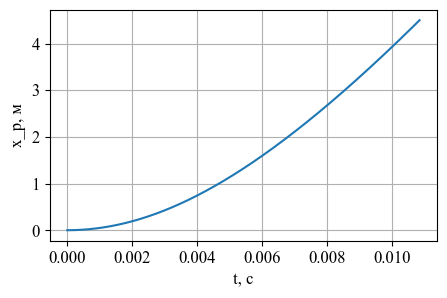

In [83]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, x_p_arr)
plt.xlabel('t, с')
plt.ylabel('x_p, м')
plt.grid()

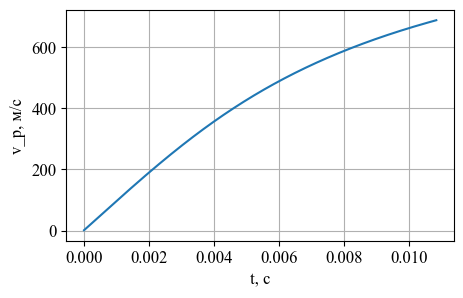

In [84]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, v_p_arr)
plt.xlabel('t, с')
plt.ylabel('v_p, м/с')
plt.grid()

In [80]:
m_H2_arr, m_O2_arr, m_H2O_arr

(array([0.13724051, 0.13724001, 0.1372395 , ..., 0.13701446, 0.13701446,
        0.13701446]),
 array([0.01715111, 0.01714708, 0.01714303, ..., 0.01534273, 0.01534273,
        0.01534273]),
 array([4.51987417e-06, 9.05500998e-06, 1.36049088e-05, ...,
        2.03894101e-03, 2.03894181e-03, 2.03894261e-03]))

In [81]:
# p_m зависит от v_p, v_p зависит от dv_p, что зависит от dt

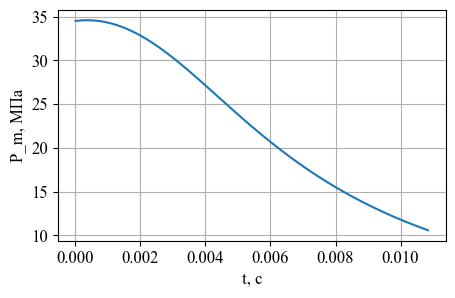

In [82]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, p_m_arr/10**6)
plt.xlabel('t, с')
plt.ylabel('P_m, МПа')
plt.grid()